In [1]:
from PIL.ExifTags import TAGS, GPSTAGS

In [2]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

In [3]:
currentPath = os.getcwd().replace('\\','/')
currentPath

'C:/Users/CSH/Projects/SSU'

In [18]:
input_dir = currentPath+"/example_test_data/"
input_files = os.listdir(os.path.join(input_dir))
print(f"Number of train images : {len(input_files)}")

Number of train images : 13


In [19]:
input_files

['0001.jpg',
 '0002.jpg',
 '0003.PNG',
 '0004.PNG',
 '0005.PNG',
 '0006.PNG',
 '0007.jpg',
 '0008.jpg',
 '0009.jpg',
 '0010.jpg',
 '0011.jpg',
 '0012.jpg',
 '0013.jpg']

In [6]:
# 반복문 통해서 인덱스 끝까지 진행하기로. len(input_files) 까지로 변경하면 됨.
img = Image.open(input_dir +input_files[0])
img.show()

In [7]:
#확인용
print(img.size)
print(img.width)
print(img.height)
print(img.filename)
print(img.mode)
print(img.info)

(4032, 3024)
4032
3024
C:/Users/CSH/Projects/SSU/example_test_data/0001.jpg
RGB
{'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (72, 72), 'exif': b'Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x0e\x01\x0f\x00\x02\x00\x00\x00\x06\x00\x00\x00\xb6\x01\x10\x00\x02\x00\x00\x00\x0e\x00\x00\x00\xbc\x01\x12\x00\x03\x00\x00\x00\x01\x00\x06\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00\xca\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00\xd2\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x011\x00\x02\x00\x00\x00\x07\x00\x00\x00\xda\x012\x00\x02\x00\x00\x00\x14\x00\x00\x00\xe2\x01<\x00\x02\x00\x00\x00\x0e\x00\x00\x00\xf6\x01B\x00\x04\x00\x00\x00\x01\x00\x00\x02\x00\x01C\x00\x04\x00\x00\x00\x01\x00\x00\x02\x00\x02\x13\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x01\x04\x88%\x00\x04\x00\x00\x00\x01\x00\x00\x08\xb2\x00\x00\t\xacApple\x00iPhone 12 Pro\x00\x00\x00\x00H\x00\x00\x00\x01\x00\x00\x00H\x00\x00\x00\x0114.7.1\x00\x002021:09:13 18:38:55\x00iPho

In [20]:
#title, ext = os.path.splitext(image_name)
title, ext = os.path.splitext(input_files[0])

In [21]:
title

'0001'

In [23]:
ext

'.jpg'

In [22]:
# png 파일 확장자 변경 => 보류

#files = glob.glob("./example_test_data/*.png")
#files

['./example_test_data\\0003.PNG',
 './example_test_data\\0004.PNG',
 './example_test_data\\0005.PNG',
 './example_test_data\\0006.PNG']

In [11]:
# png 파일 확장자 변경 2 => 보류

#for name in files :
#    if not os.path.isdir(name) :
#        src = os.path.splitext(name)
#        os.rename(name, src[0]+'.jpg')

In [12]:
# jpeg 파일 확장자 변경
files = glob.glob("./example_test_data/*.jpeg")

In [13]:
for name in files :
    if not os.path.isdir(name) :
        src = os.path.splitext(name)
        os.rename(name, src[0]+'.jpg')

## Resize / Thumbnail

In [14]:
# 몇몇 사진들이 rotate 되는 현상
# 사진을 찍을 때 세로길이 > 가로길이일 경우 어떤 카메라들은 이를 감지해 사진이 rotate 됐다는 정보를 EXIF 메타 데이터에 적어놓음
# EXIF : Exchangeable image file format

In [15]:
# help url : https://stackoverflow.com/questions/4228530/pil-thumbnail-is-rotating-my-image/63798032#63798032

In [16]:
def reorient_image(img) :
    try :
        img_exif = img._getexif()
        img_orientation = img_exif[274]
        if img_orientation in (2,'2') :
            return img.transpose(Image.FLIP_LEFT_RIGHT)
        elif img_orientation in (3,'3') :
            return img.transpose(Image.ROTATE_180)
        elif img_orientation in (4,'4') :
            return img.transpose(Image.FLIP_TOP_BOTTOM)
        elif img_orientation in (5,'5') :
            return img.transpose(Image.ROTATE_90).transpose(Image.FLIP_TOP_BOTTOM)
        elif img_orientation in (6,'6') :
            return img.transpose(Image.ROTATE_270)
        elif img_orientation in (7,'7') :
            return img.transpose(Image.ROTATE_270).transpose(Image.FLIP_TOP_BOTTOM)
        elif img_orientation in (8,'8') :
            return img.transpose(Image.ROTAT_90)
        else :
            return img
    except (KeyError, AttributeError, TypeError, IndexError) :
        return img

In [27]:
for i in input_files :
    title, ext = os.path.splitext(i)
    img = Image.open(input_dir + i)
    #img.show()
    if(ext == '.jpg') :
        img2 = reorient_image(img)
    else :
        img2 = img
    img2.thumbnail((512,512))
    img2.save("./example_test_data2/"+title+"_resize"+ext)
    img.close()

## Image Preprocessing

In [28]:
import cv2

In [47]:
input_dir2 = "./example_test_data2/"
input_files2 = os.listdir(os.path.join(input_dir2))

In [68]:
import tensorflow as tf

In [69]:
from keras.preprocessing import image

In [71]:
# 사용자가 관심이 있는 영역(ROI)는 255 픽셀값으로 채우고, 그 이외의 영역은 0 픽셀값으로 채우게 된다. 
# 0이 아닌 픽셀값을 ROI로 보게된다. 따라서 Mask를 RGB 색상을 가진 RGB Mask도 생성할 수 있다.
def create_mask_for_image(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_hsv = np.array([0,0,250])
    upper_hsv = np.array([250,255,255])
    
    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    return mask

# image  deskew function
# 한 방향으로 너무 기울어져 있거나 잘못 정렬된 이미지를 비뚤게 스캔하거나 쓴 이미지를 바로 세우는 과정
def  deskew_image(image):
    mask = create_mask_for_image(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output/255

# image  gray  function
# 회색 음영만 있는 이미지
def  gray_image(image):
    #mask = create_mask_for_image(image)
    output = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    return output/255

# image  thresh  function
#  color / gray image를 이진 이미지로. white & black
def  thresh_image(image):
    #img = read_img(df['file'][250],(255,255))
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    output = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV) #+cv.THRESH_OTSU)
    return output


# image  rnoise  function
# Image noise is random variation of brightness or color information in images, and is usually an aspect of electronic noise.
def  rnoise_image(image):
    mask = create_mask_for_image(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output/255

# image  dilate  function
# 이미지 픽셀 확장. 이미지의 각 부분에 커널을 적용해 커널과 일치하는 부분이 하나라도 0이 있으면 해당 부분 채우기
def  dilate_image(image):
    mask = create_mask_for_image(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output/255


# image  erode  function
# 이미지의 각 부분에 커널을 적용하여 커널과 일치하는 부분에 한 개라도 0이 있으면 커널과 겹치는 부분 제거. dilate와 반대
def  erode_image(image):
    mask = create_mask_for_image(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output/255


# image  opening  function
# Erosion -> Dilation 적용. 잡티나 작게 튀어나온 것들 제거.
# Closing : Dilation -> Erosion. 전체적인 윤곽 도드라지게
def  opening_image(image):
    mask = create_mask_for_image(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output/255

# image canny function
# Canny Edge Detection은 이미지 가장자리 감지
def  canny_image(image):
    mask = create_mask_for_image(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output/255


# image segmentation function
# 이미지를 특징고 특성에 따라 다른 부분으로 분할하는 디지털 영상 처리의 한 분야
def segment_image(image):
    mask = create_mask_for_image(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output/255


# sharpen the image
# 이미지 선명화. 이미지에서 가장자리와 미세한 디테일을 강조하는 기술
def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp


# function to get an image
def read_img(image_id):
    plt.figure(figsize=(16, 12))
    title, ext = os.path.splitext(image_id)
    name = input_dir2 + title + "_resize" + ext
    #img = cv2.imread(os.path.join(name))
    img = image.load_img(os.path.join(name))
    #convert image to array
    img = image.img_to_array(img)
    return img

In [34]:
df = pd.DataFrame(input_files, columns = ['image_id'])
df

image_id
0   0001.jpg
1   0002.jpg
2   0003.PNG
3   0004.PNG
4   0005.PNG
5   0006.PNG
6   0007.jpg
7   0008.jpg
8   0009.jpg
9   0010.jpg
10  0011.jpg
11  0012.jpg
12  0013.jpg

In [40]:
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

In [53]:
import matplotlib.pyplot as plt

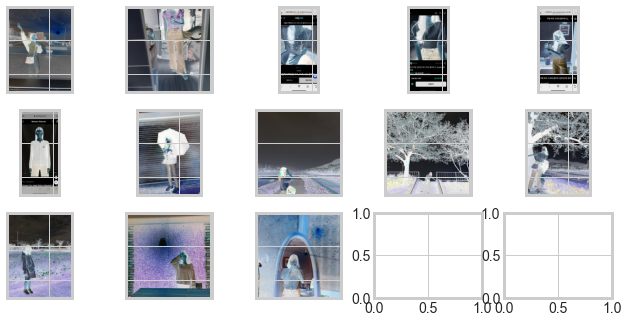

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

In [82]:
nb_rows = 3
nb_cols = 5
fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(10,5))
#plt.subtitle('SAMPLE IMAGES')
img_num = 0;
for i in range(0, nb_rows) :
    for j in range(0, nb_cols) :
        if(img_num >= 13) : break
        axs[i, j].xaxis.set_ticklabels([]);
        axs[i, j].yaxis.set_ticklabels([]);
        axs[i, j].imshow(((read_img(df['image_id'][img_num]))*255).astype(np.uint8))
        img_num=img_num+1
#plt.imshow((out * 255).astype(np.uint8))

# Show Result

## mask

<ipython-input-84-3475cad92c08>:7: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


<Figure size 1152x864 with 0 Axes>

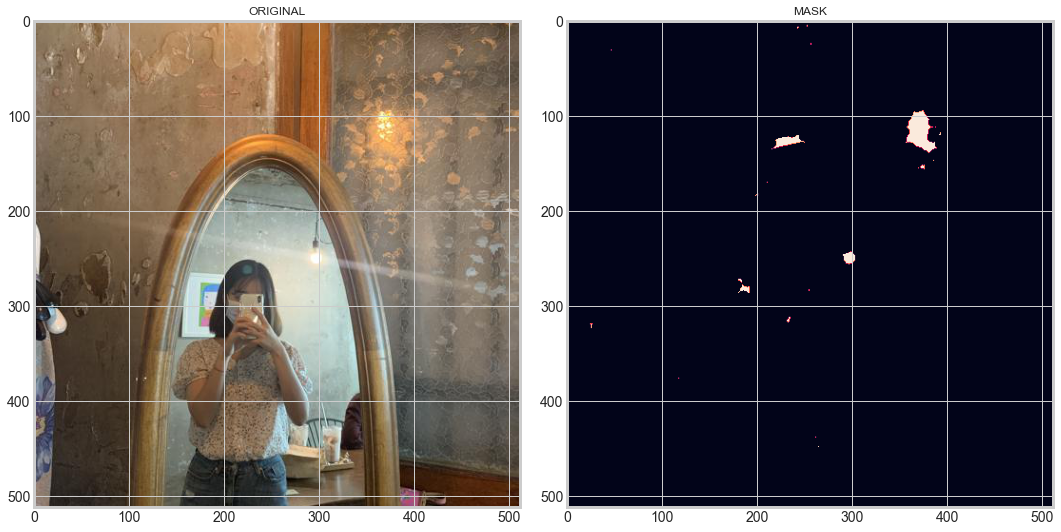

In [84]:
img = read_img(df['image_id'][12])

img_mask = create_mask_for_image(img)

fig, ax = plt.subplots(1,2, figsize=(15,10));
#plt.subtitle('RESULT', x=0.5, y=0.8)
plt.tight_layout(1)

ax[0].set_title('ORIGINAL', fontsize=12)
ax[1].set_title('MASK', fontsize=12)

ax[0].imshow(img/255);
ax[1].imshow(img_mask);

## segmented

<ipython-input-88-5a7cbf2c233f>:8: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


<Figure size 1152x864 with 0 Axes>

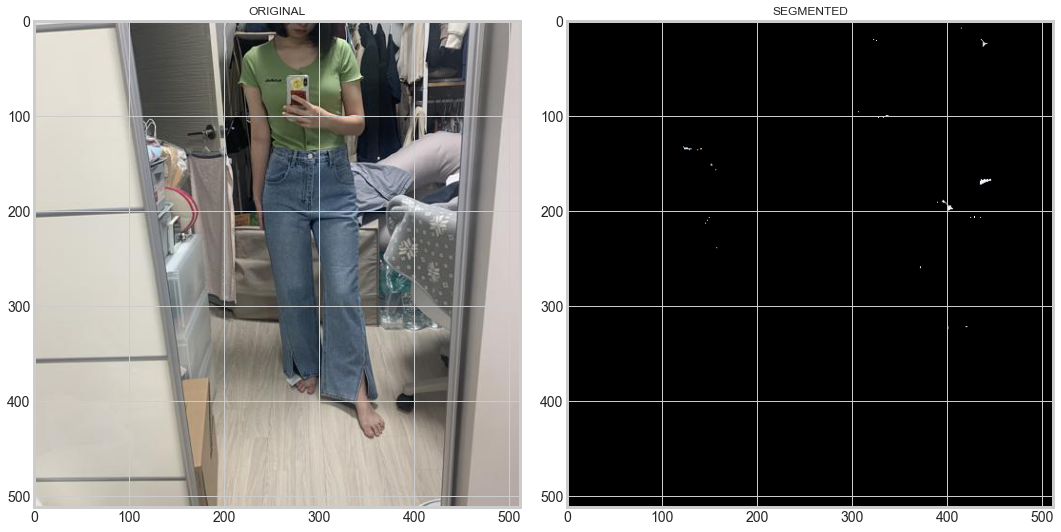

In [88]:
img = read_img(df['image_id'][1])

#segmentation
img_segmented = segment_image(img)

fig, ax = plt.subplots(1, 2, figsize=(15,10));
#plt.suptitle('RESULT', x=0.5, y=0.8)
plt.tight_layout(1)

ax[0].set_title('ORIGINAL', fontsize=12)
ax[1].set_title('SEGMENTED', fontsize=12)

ax[0].imshow(img/255);
ax[1].imshow(img_segmented);

## deskew

<ipython-input-89-936cd97f37d3>:8: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


<Figure size 1152x864 with 0 Axes>

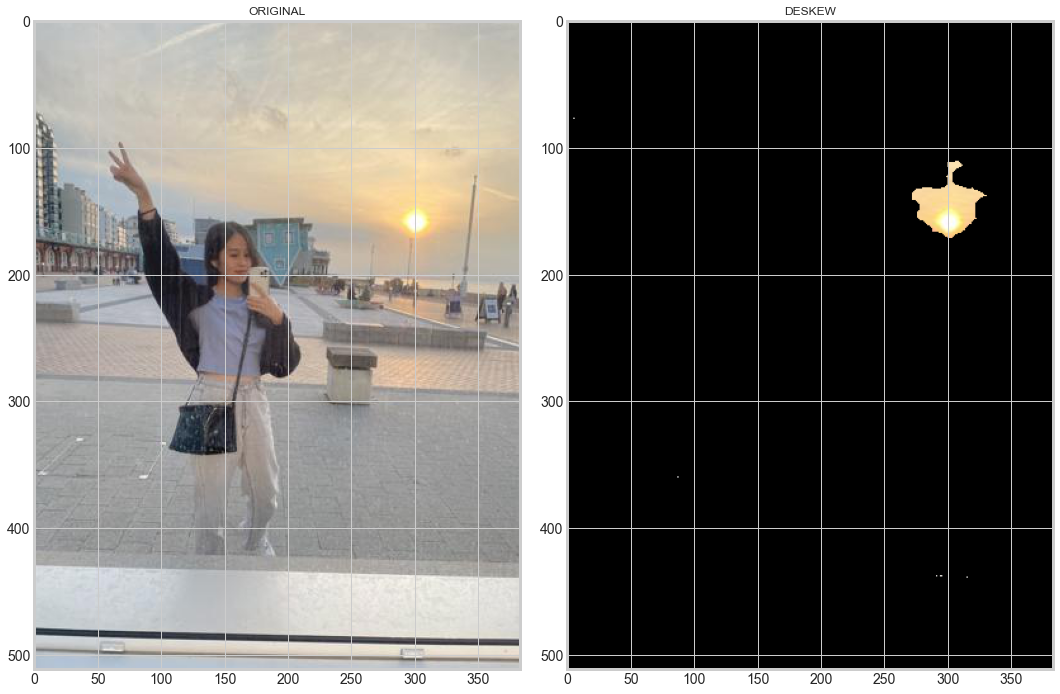

In [89]:
img = read_img(df['image_id'][0])

#deskew
img_deskew = deskew_image(img)

fig, ax = plt.subplots(1, 2, figsize=(15,10));
#plt.suptitle('RESULT', x=0.5, y=0.8)
plt.tight_layout(1)

ax[0].set_title('ORIGINAL', fontsize=12)
ax[1].set_title('DESKEW', fontsize=12)

ax[0].imshow(img/255);
ax[1].imshow(img_deskew);

## gray

<ipython-input-90-6d5d0914725c>:8: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


<Figure size 1152x864 with 0 Axes>

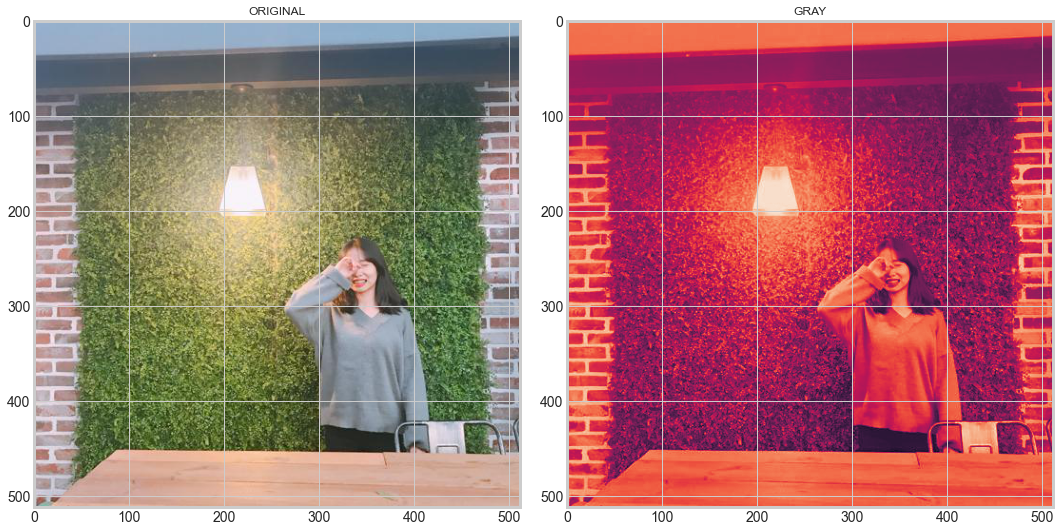

In [90]:
img = read_img(df['image_id'][11])

#gray
img_gray = gray_image(img)

fig, ax = plt.subplots(1, 2, figsize=(15, 10));
#plt.suptitle('RESULT', x=0.5, y=0.8)
plt.tight_layout(1)

ax[0].set_title('ORIGINAL', fontsize=12)
ax[1].set_title('GRAY', fontsize=12)

ax[0].imshow(img/255);
ax[1].imshow(img_gray);

## thresh

<ipython-input-92-854f7e89b25e>:7: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


<Figure size 1152x864 with 0 Axes>

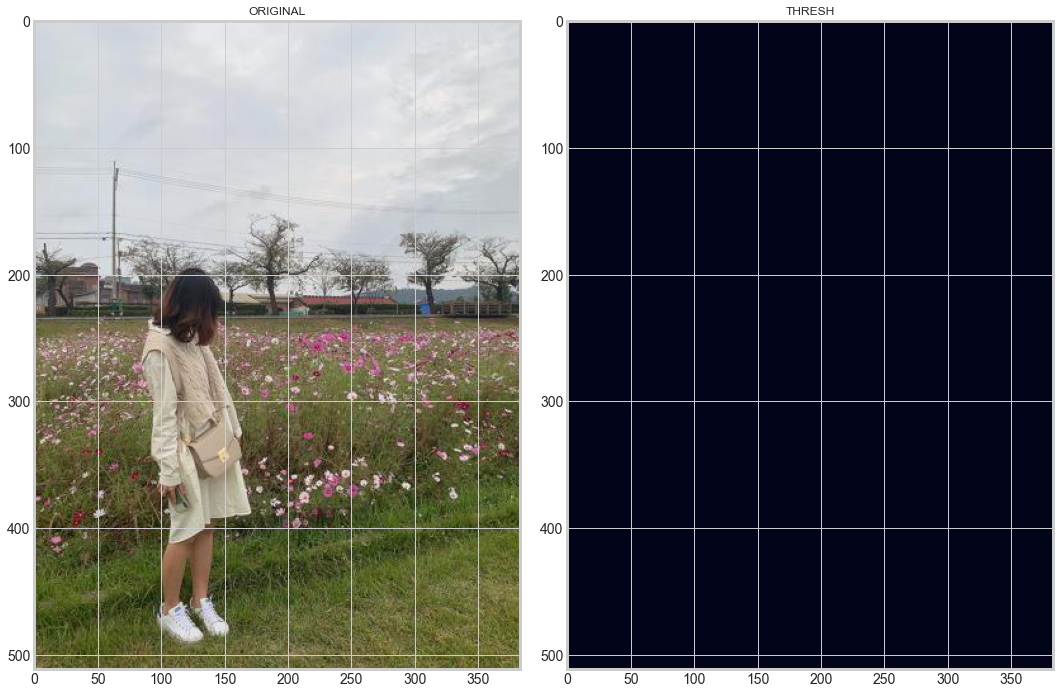

In [92]:
img = read_img(df['image_id'][10])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV) #+cv.THRESH_OTSU)
fig, ax = plt.subplots(1, 2, figsize=(15, 10));
#plt.suptitle('RESULT', x=0.5, y=0.8)
plt.tight_layout(1)

ax[0].set_title('ORIGINAL', fontsize=12)
ax[1].set_title('THRESH', fontsize=12)

ax[0].imshow(img/255);
ax[1].imshow(thresh);

## rnoise

<ipython-input-93-b89246566ceb>:8: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


<Figure size 1152x864 with 0 Axes>

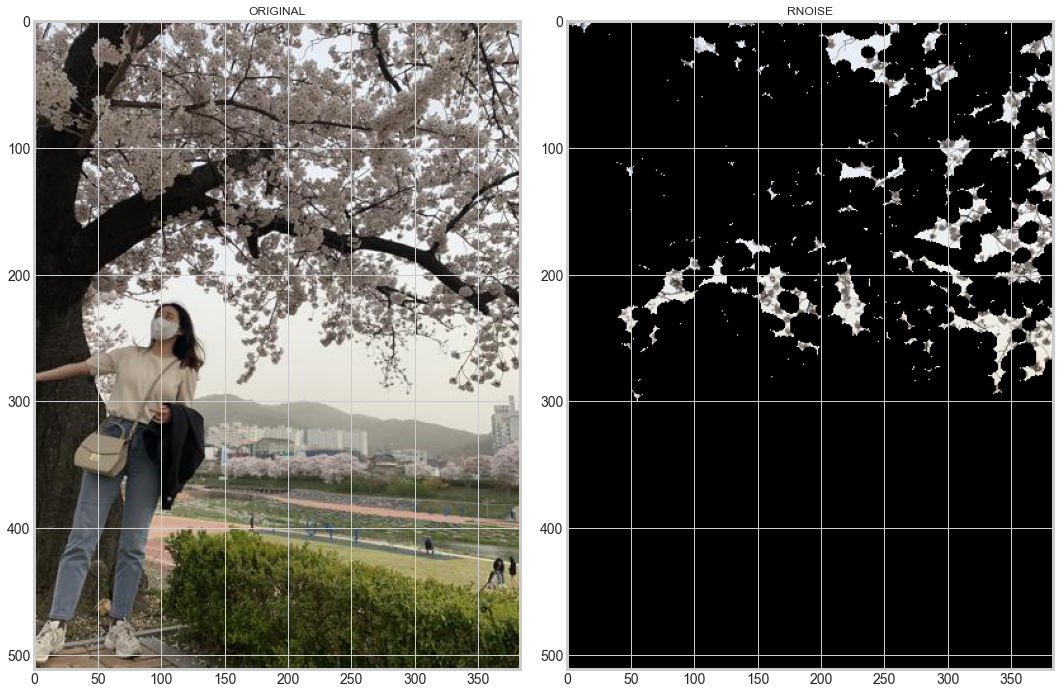

In [93]:
img = read_img(df['image_id'][9])

#rnoise
img_rnoise = rnoise_image(img)

fig, ax = plt.subplots(1, 2, figsize=(15, 10));
#plt.suptitle('RESULT', x=0.5, y=0.8)
plt.tight_layout(1)

ax[0].set_title('ORIGINAL', fontsize=12)
ax[1].set_title('RNOISE', fontsize=12)

ax[0].imshow(img/255);
ax[1].imshow(img_rnoise);

## canny

<ipython-input-95-1b60a5d50184>:8: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


<Figure size 1152x864 with 0 Axes>

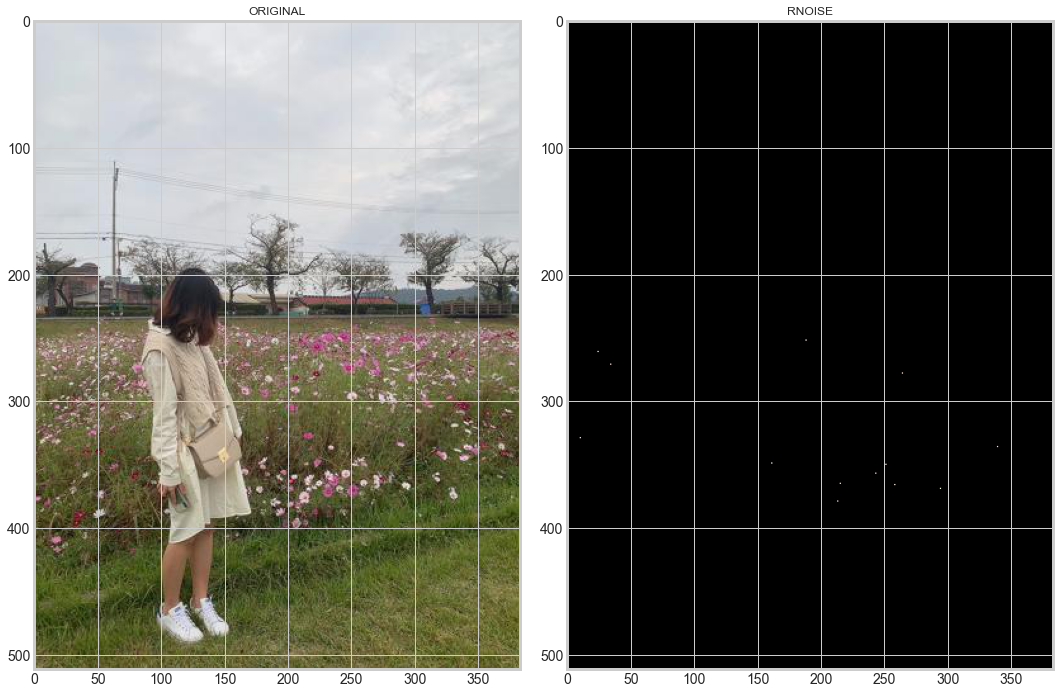

In [95]:
img = read_img(df['image_id'][10])

#rnoise
img_canny = canny_image(img)

fig, ax = plt.subplots(1, 2, figsize=(15, 10));
#plt.suptitle('RESULT', x=0.5, y=0.8)
plt.tight_layout(1)

ax[0].set_title('ORIGINAL', fontsize=12)
ax[1].set_title('RNOISE', fontsize=12)

ax[0].imshow(img/255);
ax[1].imshow(img_canny);

## sharpen

<ipython-input-96-128e3ea20c4d>:8: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 1152x864 with 0 Axes>

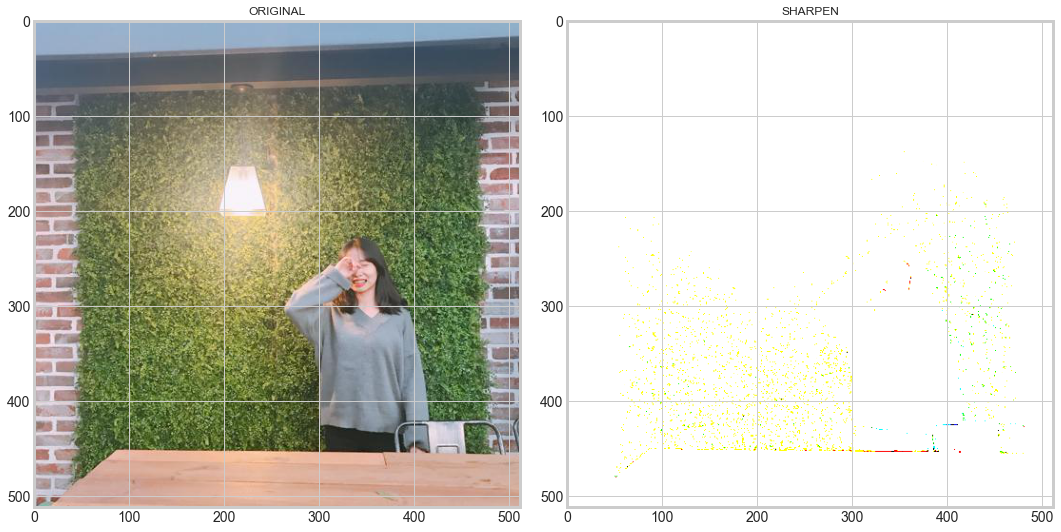

In [96]:
img = read_img(df['image_id'][11])

#sharpen the image
img_sharpen = sharpen_image(img)

fig, ax = plt.subplots(1, 2, figsize=(15,10));
#plt.suptitle('RESULT', x=0.5, y=0.8)
plt.tight_layout(1)

ax[0].set_title('ORIGINAL', fontsize=12)
ax[1].set_title('SHARPEN', fontsize=12)

ax[0].imshow(img/255);
ax[1].imshow(img_sharpen);

## comparison of color space transformation

<ipython-input-101-0785e9cf19f4>:30: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 1152x864 with 0 Axes>

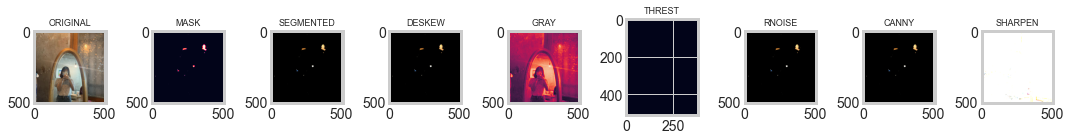

In [101]:
img = read_img(df['image_id'][12])

#mask
img_mask = create_mask_for_image(img)

#segmentation
img_segmented = segment_image(img)


#deskew
img_deskew = deskew_image(img)

#gray
img_gray = gray_image(img)

#thresh
img_thresh = thresh_image(img)

#rnoise
img_rnoise = rnoise_image(img)

#canny
img_canny = canny_image(img)

#sharpen the image
img_sharpen = sharpen_image(img)

fig, ax = plt.subplots(1, 9, figsize=(15, 6));
#plt.suptitle('RESULT', x=0.5, y=0.8)
plt.tight_layout(1)

ax[0].set_title('ORIGINAL', fontsize=9)
ax[1].set_title('MASK', fontsize=9)
ax[2].set_title('SEGMENTED', fontsize=9)
ax[3].set_title('DESKEW', fontsize=9)
ax[4].set_title('GRAY', fontsize=9)
ax[5].set_title('THREST', fontsize=9)
ax[6].set_title('RNOISE', fontsize=9)
ax[7].set_title('CANNY', fontsize=9)
ax[8].set_title('SHARPEN', fontsize=9)

ax[0].imshow(img/255);
ax[1].imshow(img_mask);
ax[2].imshow(img_segmented);
ax[3].imshow(img_deskew);
ax[4].imshow(img_gray);
ax[5].imshow(thresh);
ax[6].imshow(img_rnoise);
ax[7].imshow(img_canny);
ax[8].imshow(img_sharpen);

# 형태적 변화

## erosion

<ipython-input-102-9f983abb4101>:8: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


<Figure size 1152x864 with 0 Axes>

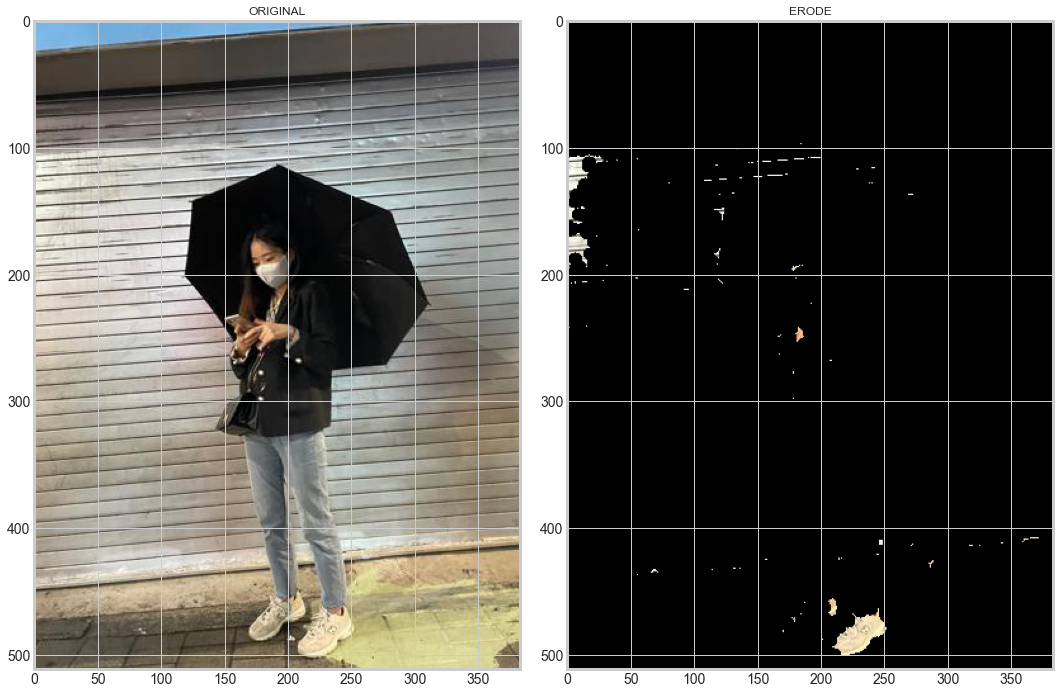

In [102]:
img = read_img(df['image_id'][6])

#erode
img_erode = erode_image(img)

fig, ax = plt.subplots(1, 2, figsize=(15, 10));
#plt.suptitle('RESULT', x=0.5, y=0.8)
plt.tight_layout(1)

ax[0].set_title('ORIGINAL', fontsize=12)
ax[1].set_title('ERODE', fontsize=12)

ax[0].imshow(img/255);
ax[1].imshow(img_erode);

## dilate

<ipython-input-103-8893d1a922d2>:8: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


<Figure size 1152x864 with 0 Axes>

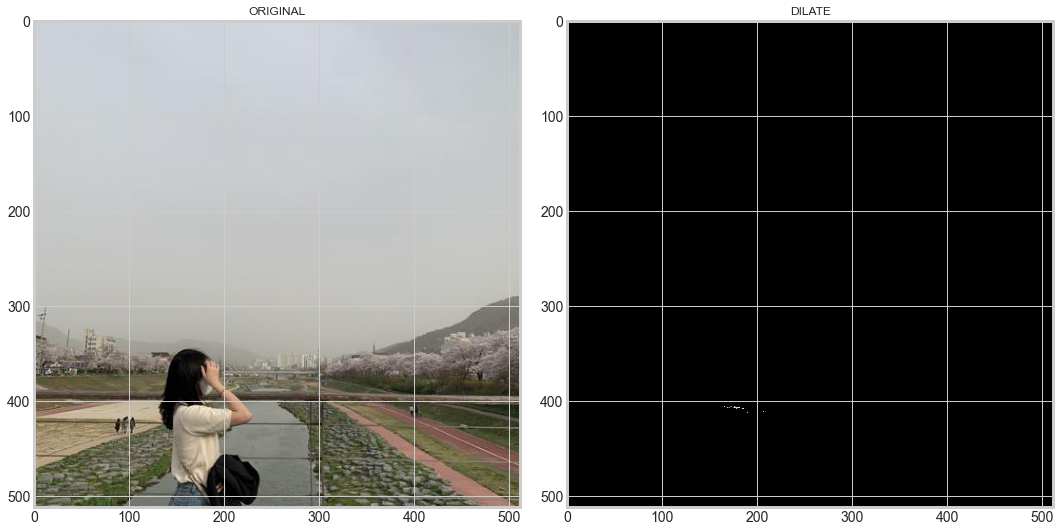

In [103]:
img = read_img(df['image_id'][7])

#dilate
img_dilate = dilate_image(img)

fig, ax = plt.subplots(1, 2, figsize=(15, 10));
#plt.suptitle('RESULT', x=0.5, y=0.8)
plt.tight_layout(1)

ax[0].set_title('ORIGINAL', fontsize=12)
ax[1].set_title('DILATE', fontsize=12)

ax[0].imshow(img/255);
ax[1].imshow(img_dilate);

## Opening

<ipython-input-105-5313cbb1923f>:8: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


<Figure size 1152x864 with 0 Axes>

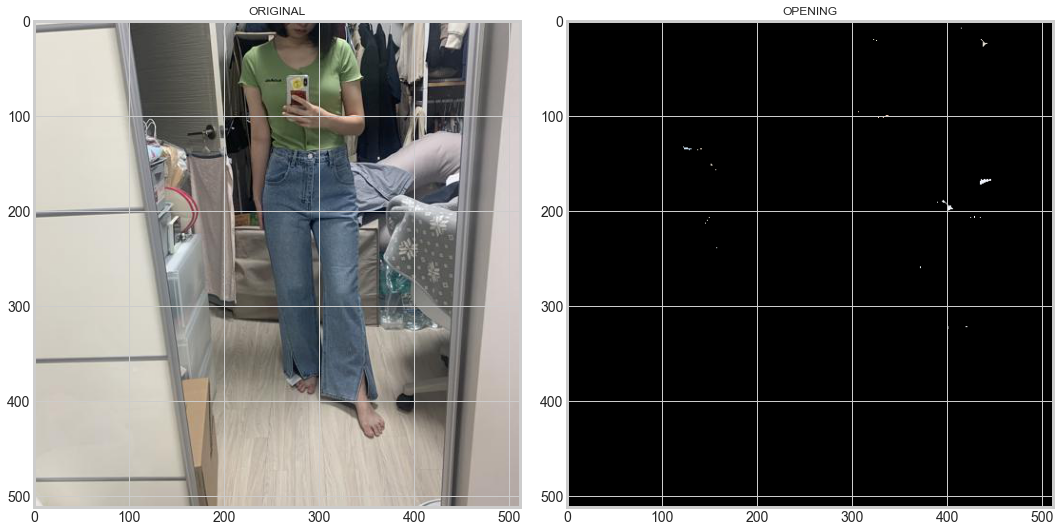

In [105]:
img = read_img(df['image_id'][1])

#opening
img_opening = opening_image(img)

fig, ax = plt.subplots(1, 2, figsize=(15, 10));
#plt.suptitle('RESULT', x=0.5, y=0.8)
plt.tight_layout(1)

ax[0].set_title('ORIGINAL', fontsize=12)
ax[1].set_title('OPENING', fontsize=12)

ax[0].imshow(img/255);
ax[1].imshow(img_opening);

## Comparison of Morphological Transformations

<ipython-input-106-2f731f147d85>:14: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


<Figure size 1152x864 with 0 Axes>

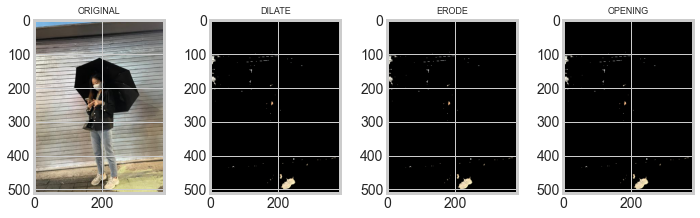

In [106]:
img = read_img(df['image_id'][6])

#dilate
img_dilate = dilate_image(img)

#erode
img_erode = erode_image(img)

#opening
img_opening = opening_image(img)

fig, ax = plt.subplots(1, 4, figsize=(10, 6));
#plt.suptitle('RESULT', x=0.5, y=0.8)
plt.tight_layout(1)

ax[0].set_title('ORIGINAL', fontsize=9)
ax[1].set_title('DILATE', fontsize=9)
ax[2].set_title('ERODE', fontsize=9)
ax[3].set_title('OPENING', fontsize=9)


ax[0].imshow(img/255);
ax[1].imshow(img_dilate);
ax[2].imshow(img_erode);
ax[3].imshow(img_opening);

# Image Blurring

In [107]:
# useful for removing noise.

## Average

<ipython-input-123-752abe38615f>:8: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


<Figure size 1152x864 with 0 Axes>

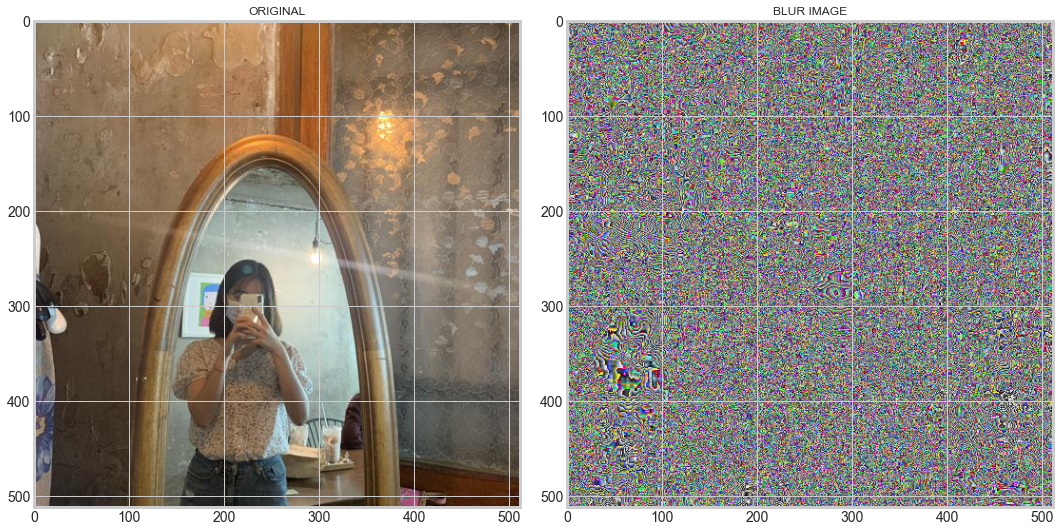

In [123]:
img = read_img(df['image_id'][12])

#Blur
blur = cv2.blur(img,(15,10))

fig, ax = plt.subplots(1, 2, figsize=(15, 10));
#plt.suptitle('RESULT', x=0.5, y=0.8)
plt.tight_layout(1)

ax[0].set_title('ORIGINAL', fontsize=12)
ax[1].set_title('BLUR IMAGE', fontsize=12)

ax[0].imshow(img/255);
ax[1].imshow((blur * 255).astype(np.uint8));

## GaussianBlur

<ipython-input-124-a325b2d2696c>:8: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


<Figure size 1152x864 with 0 Axes>

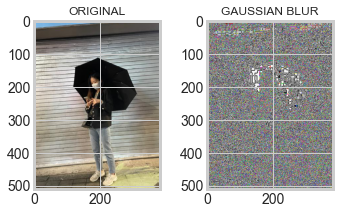

In [124]:
img = read_img(df['image_id'][6])

#GaussianBlur
Gblur = cv2.GaussianBlur(img,(5,5),0)

fig, ax = plt.subplots(1, 2, figsize=(5,5));
#plt.suptitle('RESULT', x=0.5, y=0.8)
plt.tight_layout(1)

ax[0].set_title('ORIGINAL', fontsize=12)
ax[1].set_title('GAUSSIAN BLUR', fontsize=12)

ax[0].imshow(img/255);
ax[1].imshow((Gblur* 255).astype(np.uint8));

## Median Filtering

<ipython-input-126-3c058d8f5b6c>:8: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


<Figure size 1152x864 with 0 Axes>

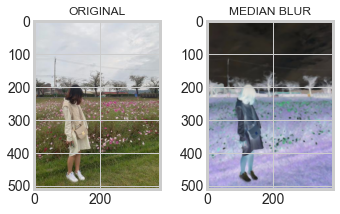

In [126]:
img = read_img(df['image_id'][10])

#medianBlur
blur_image_median = cv2.medianBlur(img,5)

fig, ax = plt.subplots(1, 2, figsize=(5, 5));
#plt.suptitle('RESULT', x=0.5, y=0.8)
plt.tight_layout(1)

ax[0].set_title('ORIGINAL', fontsize=12)
ax[1].set_title('MEDIAN BLUR', fontsize=12)

ax[0].imshow(img/255);
ax[1].imshow((blur_image_median * 255).astype(np.uint8));

## Bilateral Filtering

<ipython-input-127-178ebfdeb746>:8: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


<Figure size 1152x864 with 0 Axes>

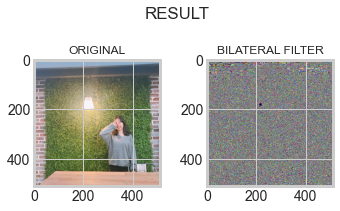

In [127]:
img = read_img(df['image_id'][11])

#BILATERAL FILTER
bilblur = cv2.bilateralFilter(img,9,75,75)

fig, ax = plt.subplots(1, 2, figsize=(5, 5));
plt.suptitle('RESULT', x=0.5, y=0.8)
plt.tight_layout(1)

ax[0].set_title('ORIGINAL', fontsize=12)
ax[1].set_title('BILATERAL FILTER', fontsize=12)

ax[0].imshow(img/255);
ax[1].imshow((bilblur* 255).astype(np.uint8));

## Comparison of Image Blurring

<ipython-input-128-190b21ca25d3>:5: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


<Figure size 1152x864 with 0 Axes>

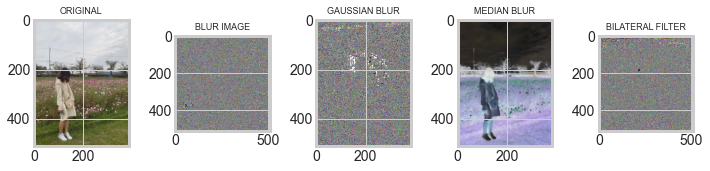

In [128]:
img = read_img(df['image_id'][10])

fig, ax = plt.subplots(1, 5, figsize=(10, 6));
#plt.suptitle('RESULT', x=0.5, y=0.8)
plt.tight_layout(1)

ax[0].set_title('ORIGINAL', fontsize=9)
ax[1].set_title('BLUR IMAGE', fontsize=9)
ax[2].set_title('GAUSSIAN BLUR', fontsize=9)
ax[3].set_title('MEDIAN BLUR', fontsize=9)
ax[4].set_title('BILATERAL FILTER', fontsize=9)


ax[0].imshow(img/255);
ax[1].imshow((blur* 255).astype(np.uint8));
ax[2].imshow((Gblur* 255).astype(np.uint8));
ax[3].imshow((blur_image_median* 255).astype(np.uint8));
ax[4].imshow((bilblur* 255).astype(np.uint8));